In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Create a black image
img = np.zeros((512,512,3), np.uint8)
 
# Draw a diagonal blue line with thickness of 5 px
cv.line(img,(0,0),(511,511),(255,0,0),5)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

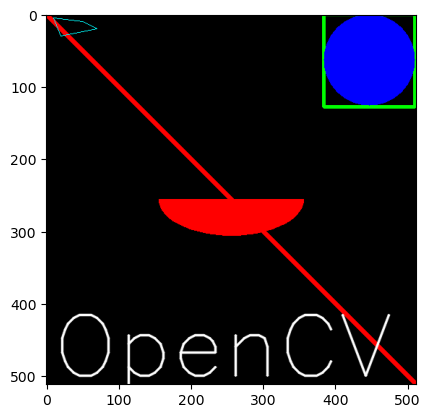

(<matplotlib.image.AxesImage at 0x1f54e6eb410>, None)

In [4]:
cv.rectangle(img,(384,0),(510,128),(0,255,0),3)
cv.circle(img,(447,63), 63, (0,0,255), -1)
cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
cv.polylines(img,[pts],True,(0,255,255))
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)
plt.imshow(img), plt.show()

In [30]:
e1 = cv.getTickCount()
# your code execution
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()

In [31]:
img1 = cv.imread('IM/FL1.jpg')
assert img1 is not None, "file could not be read, check with os.path.exists()"
e1 = cv.getTickCount()
for i in range(5,49,2):
    img1 = cv.medianBlur(img1,i)
e2 = cv.getTickCount()
t = (e2 - e1)/cv.getTickFrequency()
print( t )

7.3423987


In [32]:
cv.useOptimized()

False

In [33]:
%timeit res = cv.medianBlur(img,49)

9 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
cv.setUseOptimized(False)

In [35]:
cv.useOptimized()

False

In [36]:
%timeit res = cv.medianBlur(img,49)

8.99 ms ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
x = 5

In [38]:
%timeit y=x**2

30.3 ns ± 0.335 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [39]:
%timeit y=x*x

21.9 ns ± 0.774 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [40]:
z = np.uint8([5])

In [41]:
%timeit y=z*z

334 ns ± 2.15 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [42]:
%timeit y=np.square(z)

345 ns ± 2.02 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [43]:
%timeit z = cv.countNonZero(img)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\count_non_zero.dispatch.cpp:124: error: (-215:Assertion failed) cn == 1 in function 'cv::countNonZero'


In [ ]:
%timeit z = np.count_nonzero(img)

In [5]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


In [4]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(r'C:\Users\sanya\Videos\Captures\Художилова_лаб7.mp4')

while cap.isOpened():
    ret, frame = cap.read()

    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv.flip(frame, 0)

    # write the flipped frame
    out.write(frame)

    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break

# Release everything if job is finished
cap.release()
out.release()
cv.destroyAllWindows()
